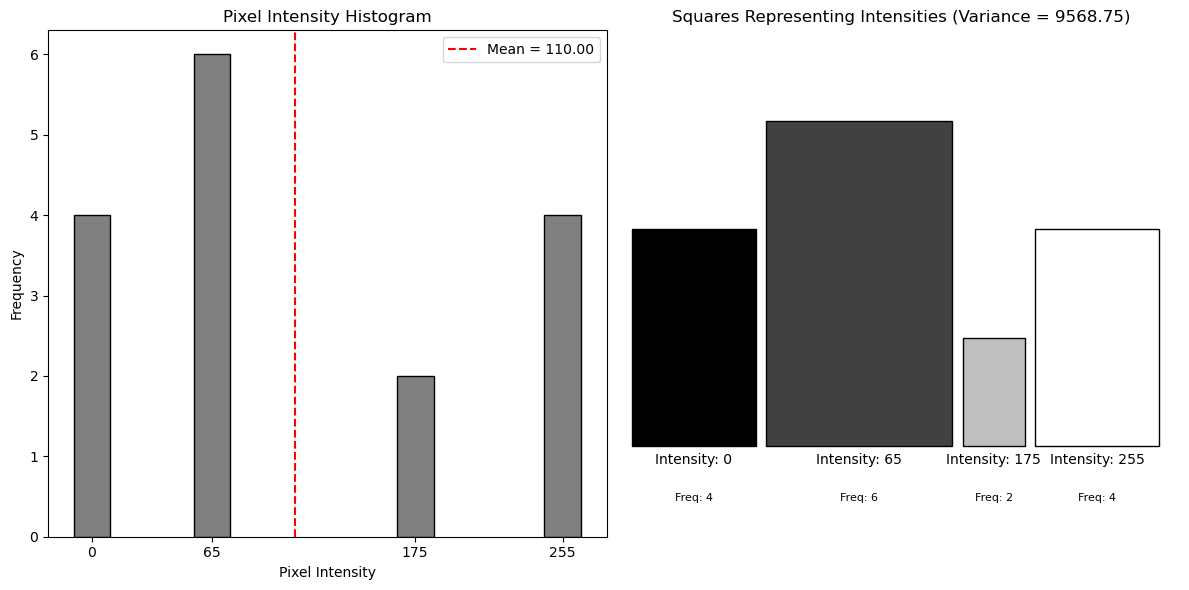

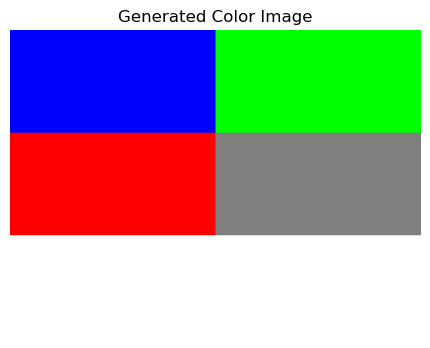

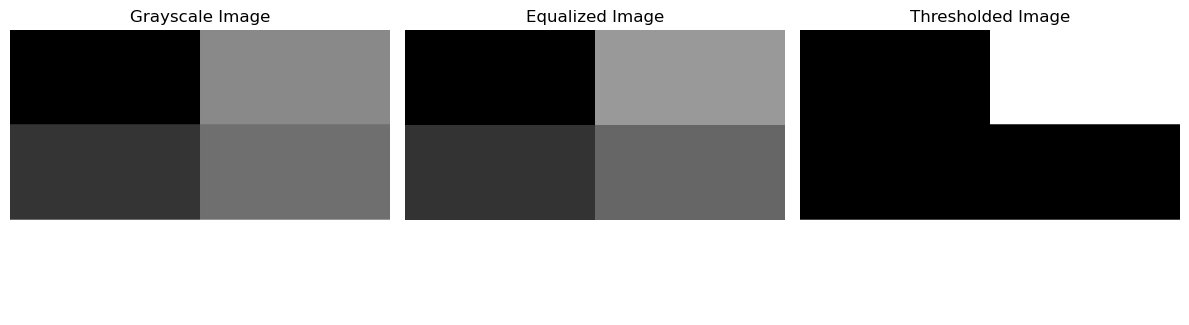

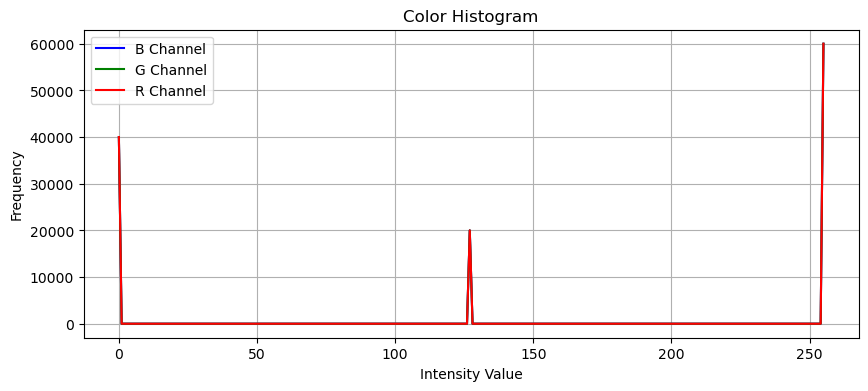

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Function to generate a grayscale intensity histogram and visualize squares
def grayscale_generator():
    # Data: Intensities and their frequencies
    intensities = [0, 65, 175, 255]  # Intensity values
    frequencies = [4, 6, 2, 4]       # Frequency values

    # Compute Mean (µ)
    mean_intensity = sum(f * x for f, x in zip(frequencies, intensities)) / sum(frequencies)

    # Compute Variance
    variance = sum(f * (x - mean_intensity) ** 2 for f, x in zip(frequencies, intensities)) / sum(frequencies)

    # Display Histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(intensities, frequencies, color='gray', width=20, edgecolor='black')
    plt.title('Pixel Intensity Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xticks(intensities)
    plt.axvline(mean_intensity, color='red', linestyle='--', label=f'Mean = {mean_intensity:.2f}')
    plt.legend()

    # Visualize Squares
    plt.subplot(1, 2, 2)
    plt.title(f'Squares Representing Intensities (Variance = {variance:.2f})')
    plt.axis('off')

    square_size_factor = 30  # Adjust size factor to scale square dimensions
    colors = ['black', '#414141', '#bfbfbf', 'white']  # Grayscale colors

    # Loop through the intensities and frequencies to draw squares
    x_offset = 0  # Horizontal offset for each square
    for i, (intensity, frequency) in enumerate(zip(intensities, frequencies)):
        square_size = frequency * square_size_factor
        plt.gca().add_patch(
            plt.Rectangle((x_offset, 0), square_size, square_size, facecolor=colors[i], edgecolor='black')
        )
        # Add labels for intensity and frequency below the squares
        plt.text(x_offset + square_size / 2, -10, f'Intensity: {intensity}', ha='center', fontsize=10)
        plt.text(x_offset + square_size / 2, -30, f'Freq: {frequency}', ha='center', fontsize=8)

        # Update horizontal offset for the next square
        x_offset += square_size + 10  # Add some spacing between squares

    # Adjust plot limits
    plt.xlim(-10, x_offset + 10)
    plt.ylim(-50, max(frequencies) * square_size_factor + 50)


    # Display plots
    plt.tight_layout()
    plt.show()


# Function to generate a synthetic color image and apply transformations
def color_image_generator():
    # Step 1: Create a synthetic color image
    image = np.zeros((300, 400, 3), dtype=np.uint8)
    image[:100, :200] = [255, 0, 0]  # Red
    image[:100, 200:] = [0, 255, 0]  # Green
    image[100:200, :200] = [0, 0, 255]  # Blue
    image[100:200, 200:] = [127, 127, 127]  # Gray
    image[200:, :] = [255, 255, 255]  # White

    # Display the image
    plt.figure(figsize=(8, 4))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Generated Color Image')
    plt.axis('off')
    plt.show()

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Apply histogram equalization
    equalized = cv2.equalizeHist(gray_image)

    # Step 3: Apply thresholding
    _, thresh_global = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Step 4: Display results
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(equalized, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(thresh_global, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Step 5: Compute and display color histograms
    colors = ('b', 'g', 'r')
    plt.figure(figsize=(10, 4))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color, label=f'{color.upper()} Channel')
    plt.title('Color Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()


# Run the generators
grayscale_generator()
color_image_generator()
